In [575]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
# convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [614]:
import requests

def get_coordinates(api_key, address, verbose=False):
    try:
        url = 'https://maps.googleapis.com/maps/api/geocode/json?key={}&address={}'.format(api_key, address)
        response = requests.get(url).json()
        if verbose:
            print('Google Maps API JSON result =>', response)
        results = response['results']
        geographical_data = results[0]['geometry']['location'] # get geographical coordinates
        lat = geographical_data['lat']
        lon = geographical_data['lng']
        return [lat, lon]
    except:
        return [None, None]

In [615]:
address = 'Philadelphia'

geolocator = Nominatim(user_agent="philadelphia_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Philadelphia are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Philadelphia are 39.9527237, -75.1635262.


In [616]:
df = pd.read_excel('/Users/rayhowanski/Documents/Python Test/test_output/philadelphia.xls')

In [617]:
df['properties.DIVISION'].unique()

array(['Central', 'SouthWest', 'East', 'NorthEast', 'South', 'NorthWest',
       'Northwest', 'Southwest'], dtype=object)

In [618]:
# create map of New York using latitude and longitude values
map_philadelphia = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, borough, neighborhood in zip(df['lat'], df['long'], df['properties.DIVISION'], df['properties.SITE_NAME']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_philadelphia)  
    
    
map_philadelphia

In [619]:
central = df[df['properties.DIVISION'] == 'Central']
central

,Unnamed: 0,type,id,geometry.type,long,lat,properties.CATEGORY,properties.DIVISION,properties.OBJECTID_1,properties.DISTRICT,properties.DISTRICT_2,properties.DESIGNATED,properties.BOUNDARIES,properties.SITE_NAME,properties.SHAPE_Leng,properties.Shape_Le_1,properties.ID
0,0,Feature,0,Polygon,-75.161743,39.952551,Active PhillyRising Neighborhood,Central,1,6th,6th,Y,10th to Broad/Arch to Chestnut/Convention Center,Market East,10106.416772,10106.416772,0
4,4,Feature,4,Polygon,-75.181694,39.995159,Active PhillyRising Neighborhood,Central,5,22nd,22nd,Y,Lehigh to Dauphin/28th to 33rd,Strawberry Mansion,9091.679486,9091.679486,5
5,5,Feature,5,Polygon,-75.173158,39.985016,Active PhillyRising Neighborhood,Central,6,22nd,22nd,Y,Diamond to Montgomery/22nd to 27th,North Central,7863.437652,7863.437652,6
13,13,Feature,13,Polygon,-75.150766,39.989878,Active PhillyRising Neighborhood,Central,14,22nd,22nd,Y,10th to 13th/Lehigh to Susquehanna,Penrose,8304.213813,8304.213812,0
18,18,Feature,18,Polygon,-75.182129,39.979015,PhillyRising 2.0 Neighborhood,Central,19,22nd,22nd,Y,27th/30th/Thompson/CB Moore,Brewerytown,6777.632555,6777.632555,0


In [654]:
df

,Unnamed: 0,type,id,geometry.type,long,lat,properties.CATEGORY,properties.DIVISION,properties.OBJECTID_1,properties.DISTRICT,properties.DISTRICT_2,properties.DESIGNATED,properties.BOUNDARIES,Neighborhood,properties.SHAPE_Leng,properties.Shape_Le_1,properties.ID
0,0,Feature,0,Polygon,-75.161743,39.952551,Active PhillyRising Neighborhood,Central,1,6th,6th,Y,10th to Broad/Arch to Chestnut/Convention Center,Market East,10106.416772,10106.416772,0
1,1,Feature,1,Polygon,-75.247880,39.967290,Active PhillyRising Neighborhood,SouthWest,2,19th,19th,Y,62nd to 67th/Arch to Girard,Haddington,10171.137092,10171.137092,1
2,2,Feature,2,Polygon,-75.146967,39.990098,Active PhillyRising Neighborhood,East,3,26th,26th,Y,10th to 6th/York to Lehigh,Hartranft,6592.812307,6592.812307,2
3,3,Feature,3,Polygon,-75.082760,40.019683,Active PhillyRising Neighborhood,NorthEast,4,15th,15th,Y,Dyre to Margaret/Duffield to Leiper,Frankford,8154.176620,8154.176620,3
4,4,Feature,4,Polygon,-75.181694,39.995159,Active PhillyRising Neighborhood,Central,5,22nd,22nd,Y,Lehigh to Dauphin/28th to 33rd,Strawberry Mansion,9091.679486,9091.679486,5
5,5,Feature,5,Polygon,-75.173158,39.985016,Active PhillyRising Neighborhood,Central,6,22nd,22nd,Y,Diamond to Montgomery/22nd to 27th,North Central,7863.437652,7863.437652,6
6,6,Feature,6,Polygon,-75.155809,39.924798,Active PhillyRising Neighborhood,South,7,3rd,3rd,Y,4th to 7th/Tasker to Ritner,Southeast,9932.366134,9932.366134,10
7,7,Feature,7,Polygon,-75.231763,39.935738,Active PhillyRising Neighborhood,SouthWest,8,12th,12th,Y,54th to 60th/Florence to Kingsessing,Kingsessing,10565.574873,10565.574873,13
8,8,Feature,8,Polygon,-75.234286,39.921148,Active PhillyRising Neighborhood,SouthWest,9,12th,12th,Y,65th to 70th/Paschall to Buist,Elmwood,8877.309188,8877.309187,17
9,9,Feature,9,Polygon,-75.120475,39.996413,Active PhillyRising Neighborhood,East,10,25th,24th/25th,Y,Ontario/H St/Kensington/Somerset/B St,Kensington/Harrowgate,12240.026390,12240.026390,18


In [621]:
CLIENT_ID = 'IW130FHIQXSUSN0AQR30WFPAWIFYSIP5ZKJUHN4LMFOFEHX2' # your Foursquare ID
CLIENT_SECRET = 'ULBMZ04ODQGGFL1H3XRHN5L5N5ZSF25VD4E5SY455Z5KE0KH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IW130FHIQXSUSN0AQR30WFPAWIFYSIP5ZKJUHN4LMFOFEHX2
CLIENT_SECRET:ULBMZ04ODQGGFL1H3XRHN5L5N5ZSF25VD4E5SY455Z5KE0KH


In [622]:
neighborhood_latitude = df.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'long'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'properties.SITE_NAME'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Market East are 39.95255092, -75.16174273.


In [623]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=IW130FHIQXSUSN0AQR30WFPAWIFYSIP5ZKJUHN4LMFOFEHX2&client_secret=ULBMZ04ODQGGFL1H3XRHN5L5N5ZSF25VD4E5SY455Z5KE0KH&v=20180605&ll=39.95255092,-75.16174273&radius=1000&limit=200'

In [624]:
results = requests.get(url).json()

In [625]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [626]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/Users/rayhowanski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



,name,categories,lat,lng
0,Reading Terminal Market,Market,39.953341,-75.159306
1,City Hall Courtyard,Plaza,39.952484,-75.163592
2,The Wanamaker Organ,Concert Hall,39.951536,-75.162752
3,Beiler's Doughnuts,Donut Shop,39.953697,-75.159307
4,Fogo De Chão,Churrascaria,39.950917,-75.162971


In [627]:
neighborhood_latitude = df.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'long'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'properties.SITE_NAME'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

results = requests.get(url).json()

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
    venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

Latitude and longitude values of Market East are 39.95255092, -75.16174273.


/Users/rayhowanski/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



,name,categories,lat,lng
0,Reading Terminal Market,Market,39.953341,-75.159306
1,City Hall Courtyard,Plaza,39.952484,-75.163592
2,The Wanamaker Organ,Concert Hall,39.951536,-75.162752
3,Beiler's Doughnuts,Donut Shop,39.953697,-75.159307
4,Fogo De Chão,Churrascaria,39.950917,-75.162971


In [628]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [629]:
df_venues = getNearbyVenues(names=df['properties.SITE_NAME'],
                                   latitudes=df['lat'],
                                   longitudes=df['long']
                                  )

Market East
Haddington
Hartranft
Frankford
Strawberry Mansion
North Central
Southeast
Kingsessing
Elmwood
Kensington/Harrowgate
Lawncrest
Swampoodle
Point Breeze
Penrose
St. Hughs
Hawthorne
Germantown
Eastwick
Brewerytown


In [630]:
df_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Market East,39.952551,-75.161743,Reading Terminal Market,39.953341,-75.159306,Market
1,Market East,39.952551,-75.161743,City Hall Courtyard,39.952484,-75.163592,Plaza
2,Market East,39.952551,-75.161743,The Wanamaker Organ,39.951536,-75.162752,Concert Hall
3,Market East,39.952551,-75.161743,Beiler's Doughnuts,39.953697,-75.159307,Donut Shop
4,Market East,39.952551,-75.161743,Fogo De Chão,39.950917,-75.162971,Churrascaria
5,Market East,39.952551,-75.161743,Miller's Twist,39.953704,-75.159204,Snack Place
6,Market East,39.952551,-75.161743,Termini Brothers Bakery,39.953060,-75.159560,Bakery
7,Market East,39.952551,-75.161743,Dilworth Park,39.952772,-75.164723,Park
8,Market East,39.952551,-75.161743,Trader Joe's,39.954191,-75.162434,Grocery Store
9,Market East,39.952551,-75.161743,"The Ritz-Carlton, Philadelphia",39.951446,-75.164149,Hotel


In [631]:
yoga = df_venues['Venue Category'] == 'Yoga Studio'
display  = df_venues[yoga]
display

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
83,Market East,39.952551,-75.161743,Dhyana Yoga,39.949882,-75.167990,Yoga Studio
323,Southeast,39.924798,-75.155809,Wake Up Yoga,39.927125,-75.166722,Yoga Studio


In [632]:
# one hot encoding
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] =df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Garden,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Cambodian Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Donut Shop,Drugstore,Dry Cleaner,Dutch Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Poke Place,Pub,Public Art,Record Shop,Recreation Center,Restaurant,River,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Market East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Market East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Market East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Market East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [633]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()
df_grouped

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Garden,Beer Store,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Café,Cambodian Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Donut Shop,Drugstore,Dry Cleaner,Dutch Restaurant,Ethiopian Restaurant,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Garden,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Poke Place,Pub,Public Art,Record Shop,Recreation Center,Restaurant,River,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Brewerytown,0.000000,0.024390,0.024390,0.00,0.00,0.02439,0.024390,0.00,0.000000,0.000000,0.024390,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.024390,0.024390,0.024390,0.00,0.024390,0.000000,0.04878,0.00,0.000000,0.00,0.024390,0.00,0.000000,0.00,0.048780,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.024390,0.00,0.000000,0.02439,0.048780,0.000000,0.000000,0.000000,0.000000,0.00,0.02439,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.02439,0.000000,0.00000,0.00,0.00,0.00,0.00,0.00,0.024390,0.000000,0.000000,0.000000,0.00000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.048780,0.00,0.02439,0.00,0.00,0.00,0.00,0.00000,0.000000,0.048780,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.02439,0.000000,0.000000,0.000000,0.00,0.0000,0.000000,0.00,0.00,0.000000,0.00,0.00000,0.00,0.00,0.00,0.121951,0.000000,0.00,0.000000,0.048780,0.000000,0.024390,0.00,0.00,0.00,0.00,0.02439,0.000000,0.02439,0.00,0.000000,0.000000,0.00,0.024390,0.000000,0.000000,0.000000,0.04878,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.024390,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.00
1,Eastwick,0.000000,0.000000,0.035714,0.00,0.00,0.00000,0.000000,0.00,0.00000

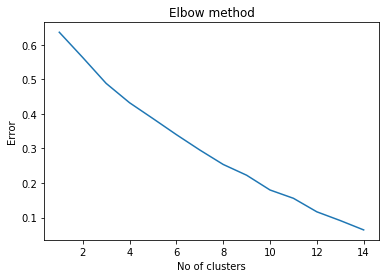

In [659]:
df_onehot_index = df_grouped.set_index('Neighborhood')

Error =[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i).fit(df_onehot_index)
    kmeans.fit(df_onehot_index)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 15), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.savefig('/Users/rayhowanski/Documents/Python Test/elbow_plot.png')

In [634]:
num_top_venues = 5

for hood in df_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Brewerytown----
          venue  freq
0          Park  0.12
1          Café  0.05
2   Pizza Place  0.05
3   Coffee Shop  0.05
4  Liquor Store  0.05


----Eastwick----
                  venue  freq
0  Fast Food Restaurant  0.14
1        Sandwich Place  0.07
2              Pharmacy  0.07
3           Pizza Place  0.07
4     Mobile Phone Shop  0.07


----Elmwood----
                venue  freq
0         Pizza Place  0.13
1          Donut Shop  0.10
2  Chinese Restaurant  0.08
3  Seafood Restaurant  0.08
4      Breakfast Spot  0.05


----Frankford----
               venue  freq
0        Bus Station  0.14
1         Donut Shop  0.07
2  Convenience Store  0.07
3                Gym  0.07
4               Bank  0.07


----Germantown----
                 venue  freq
0       Discount Store  0.13
1  American Restaurant  0.13
2          Coffee Shop  0.13
3         Intersection  0.13
4           Playground  0.07


----Haddington----
                venue  freq
0  Light Rail Station  0.12
1        

In [635]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [636]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brewerytown,Park,Discount Store,Café,Pizza Place,Intersection,Coffee Shop,Liquor Store,Sculpture Garden,Italian Restaurant,Mini Golf
1,Eastwick,Fast Food Restaurant,Pizza Place,Discount Store,Sandwich Place,Bank,Mobile Phone Shop,Pharmacy,Bowling Alley,Shopping Plaza,Shoe Store
2,Elmwood,Pizza Place,Donut Shop,Chinese Restaurant,Seafood Restaurant,Breakfast Spot,Discount Store,Shoe Store,Convenience Store,Cosmetics Shop,Roller Rink
3,Frankford,Bus Station,Donut Shop,Gym,Convenience Store,Bank,Food Truck,Miscellaneous Shop,Metro Station,Platform,Snack Place
4,Germantown,Intersection,Coffee Shop,Discount Store,American Restaurant,Southern / Soul Food Restaurant,Playground,Pizza Place,Bank,Fabric Shop,Nightclub
5,Haddington,Light Rail Station,Pharmacy,Snack Place,Skate Park,Sports Bar,Bus Station,Southern / Soul Food Restaurant,Metro Station,Seafood Restaurant,Fried Chicken Joint
6,Hartranft,Fast Food Restaurant,Discount Store,Metro Station,Intersection,Pizza Place,Pharmacy,Seafood Restaurant,Train Station,Donut Shop,Office
7,Hawthorne,Pizza Place,Mexican Restaurant,Coffee Shop,Italian Restaurant,Bar,Vietnamese Restaurant,Gastropub,Pub,Concert Hall,Sandwich Place
8,Kensington/Harrowgate,Pharmacy,Diner,Discount Store,Donut Shop,Pizza Place,Market,Dessert Shop,Recreation Center,Mobile Phone Shop,Clothing Store
9,Kingsessing,Discount Store,Pizza Place,Grocery Store,Intersection,Moving Target,Bus Station,Convenience Store,Cosmetics Shop,Shopping Mall,Mobile Phone Shop


In [637]:
# set number of clusters
kclusters = 5

df_grouped_clustering = df_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:30] 

array([1, 0, 4, 4, 2, 4, 4, 1, 4, 4, 1, 1, 4, 4, 1, 1, 4, 3, 3],
      dtype=int32)

In [638]:
df = df.rename(columns={'properties.SITE_NAME':'Neighborhood'})

In [639]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

df_merged.head(10) # check the last columns!

,Unnamed: 0,type,id,geometry.type,long,lat,properties.CATEGORY,properties.DIVISION,properties.OBJECTID_1,properties.DISTRICT,properties.DISTRICT_2,properties.DESIGNATED,properties.BOUNDARIES,Neighborhood,properties.SHAPE_Leng,properties.Shape_Le_1,properties.ID,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Feature,0,Polygon,-75.161743,39.952551,Active PhillyRising Neighborhood,Central,1,6th,6th,Y,10th to Broad/Arch to Chestnut/Convention Center,Market East,10106.416772,10106.416772,0,1,Hotel,Sandwich Place,Italian Restaurant,Vegetarian / Vegan Restaurant,Salad Place,Spa,Coffee Shop,Pizza Place,Steakhouse,Mediterranean Restaurant
1,1,Feature,1,Polygon,-75.247880,39.967290,Active PhillyRising Neighborhood,SouthWest,2,19th,19th,Y,62nd to 67th/Arch to Girard,Haddington,10171.137092,10171.137092,1,4,Light Rail Station,Pharmacy,Snack Place,Skate Park,Sports Bar,Bus Station,Southern / Soul Food Restaurant,Metro Station,Seafood Restaurant,Fried Chicken Joint
2,2,Feature,2,Polygon,-75.146967,39.990098,Active PhillyRising Neighborhood,East,3,26th,26th,Y,10th to 6th/York to Lehigh,Hartranft,6592.812307,6592.812307,2,4,Fast Food Restaurant,Discount Store,Metro Station,Intersection,Pizza Place,Pharmacy,Seafood Restaurant,Train Station,Donut Shop,Office
3,3,Feature,3,Polygon,-75.082760,40.019683,Active PhillyRising Neighborhood,NorthEast,4,15th,15th,Y,Dyre to Margaret/Duffield to Leiper,Frankford,8154.176620,8154.176620,3,4,Bus Station,Donut Shop,Gym,Convenience Store,Bank,Food Truck,Miscellaneous Shop,Metro Station,Platform,Snack Place
4,4,Feature,4,Polygon,-75.181694,39.995159,Active PhillyRising Neighborhood,Central,5,22nd,22nd,Y,Lehigh to Dauphin/28th to 33rd,Strawberry Mansion,9091.679486,9091.679486,5,3,Intersection,Grocery Store,Park,Baseball Field,Seafood Restaurant,Music Venue,Fried Chicken Joint,Farmers Market,Breakfast Spot,River
5,5,Feature,5,Polygon,-75.173158,39.985016,Active PhillyRising Neighborhood,Central,6,22nd,22nd,Y,Diamond to Montgomery/22nd to 27th,North Central,7863.437652,7863.437652,6,4,Deli / Bodega,Intersection,Park,Breakfast Spot,Southern / Soul Food Restaurant,Food Court,Fried Chicken Joint,Pizza Place,Middle Eastern Restaurant,Chinese Restaurant
6,6,Feature,6,Polygon,-75.155809,39.924798,Active PhillyRising Neighborhood,South,7,3rd,3rd,Y,4th to 7th/Tasker to Ritner,Southeast,9932.366134,9932.366134,10,1,Bar,Bakery,Pizza Place,Coffee Shop,Mexican Restaurant,Sandwich Place,Deli / Bodega,Café,Italian Restaurant,Beer Garden
7,7,Feature,7,Polygon,-75.231763,39.935738,Active PhillyRising Neighborhood,SouthWest,8,12th,12th,Y,54th to 60th/Florence to Kingsessing,Kingsessing,10565.574873,10565.574873,13,4,Discount Store,Pizza Place,Grocery Store,Intersection,Moving Target,Bus Station,Convenience Store,Cosmetics Shop,Shopping Mall,Mobile Phone Shop
8,8,Feature,8,Polygon,-75.234286,39.921148,Active PhillyRising Neighborhood,SouthWest,9,12th,12th,Y,65th to 70th/Paschall to Buist,Elmwood,8877.309188,8877.309187,17,4,Pizza Place,Donut Shop,Chinese Restaurant,Seafood Restaurant,Breakfast Spot,Discount Store,Shoe Store,Convenience Store,Cosmetics Shop,Roller Rink
9,9,Feature,9,Polygon,-75.120475,39.996413,Active PhillyRising Neighborhood,East,10,25th,24th/25th,Y,Ontario/H St/Kensington/Somerset/B St,Kensington/Harrowgate,12240.026390,12240.026390,18,4,Pharmacy,Diner,Discount Store,Donut Shop,Pizza Place,Market,Dessert Shop,Recreation Center,Mobile Phone Shop,Clothing Store


In [640]:
display

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
83,Market East,39.952551,-75.161743,Dhyana Yoga,39.949882,-75.167990,Yoga Studio
323,Southeast,39.924798,-75.155809,Wake Up Yoga,39.927125,-75.166722,Yoga Studio


In [641]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['lat'], df_merged['long'], df_merged['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.6).add_to(map_clusters)
    
for lat, lon,poi in zip(display['Venue Latitude'], display['Venue Longitude'], display['Venue Category']):
    label = folium.Popup('Current Yoga Studio')
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [688]:
fitness = df_grouped[['Neighborhood','Gym','Yoga Studio']]

In [689]:
fitness = fitness.sort_values(by=['Gym'])
fitness

,Neighborhood,Gym,Yoga Studio
0,Brewerytown,0.000000,0.00
16,St. Hughs,0.000000,0.00
14,Point Breeze,0.000000,0.00
12,North Central,0.000000,0.00
10,Lawncrest,0.000000,0.00
9,Kingsessing,0.000000,0.00
4,Germantown,0.000000,0.00
2,Elmwood,0.000000,0.00
1,Eastwick,0.000000,0.00
5,Haddington,0.000000,0.00


In [692]:
labels = df_merged[['Neighborhood','Cluster Labels','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue']]

In [694]:
labels = labels.sort_values(by=['Cluster Labels'])
labels

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
17,Eastwick,0,Fast Food Restaurant,Pizza Place,Discount Store,Sandwich Place,Bank
0,Market East,1,Hotel,Sandwich Place,Italian Restaurant,Vegetarian / Vegan Restaurant,Salad Place
15,Hawthorne,1,Pizza Place,Mexican Restaurant,Coffee Shop,Italian Restaurant,Bar
12,Point Breeze,1,Pizza Place,Bar,Discount Store,Breakfast Spot,Brewery
10,Lawncrest,1,Vietnamese Restaurant,Fast Food Restaurant,Supermarket,Pharmacy,Bar
6,Southeast,1,Bar,Bakery,Pizza Place,Coffee Shop,Mexican Restaurant
18,Brewerytown,1,Park,Discount Store,Café,Pizza Place,Intersection
16,Germantown,2,Intersection,Coffee Shop,Discount Store,American Restaurant,Southern / Soul Food Restaurant
11,Swampoodle,3,Intersection,Breakfast Spot,Grocery Store,Fast Food Restaurant,Pharmacy
4,Strawberry Mansion,3,Intersection,Grocery Store,Park,Baseball Field,Seafood Restaurant


In [647]:
df_venues['count']=1
df_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,count
0,Market East,39.952551,-75.161743,Reading Terminal Market,39.953341,-75.159306,Market,1
1,Market East,39.952551,-75.161743,City Hall Courtyard,39.952484,-75.163592,Plaza,1
2,Market East,39.952551,-75.161743,The Wanamaker Organ,39.951536,-75.162752,Concert Hall,1
3,Market East,39.952551,-75.161743,Beiler's Doughnuts,39.953697,-75.159307,Donut Shop,1
4,Market East,39.952551,-75.161743,Fogo De Chão,39.950917,-75.162971,Churrascaria,1


In [652]:
import plotly.express as px

fig = px.bar(df_venues, x='Neighborhood', y='count')
fig.update_layout(title='Philadelphia Neighborhood Venue Number (Max of 100)',
                 xaxis_title='Neighborhood',
                 yaxis_title='Count')
fig.show()

In [676]:
t = df_grouped.set_index('Neighborhood')

In [677]:
t = t.transpose()

In [681]:
t= t.reset_index()
t

Neighborhood,index,Brewerytown,Eastwick,Elmwood,Frankford,Germantown,Haddington,Hartranft,Hawthorne,Kensington/Harrowgate,Kingsessing,Lawncrest,Market East,North Central,Penrose,Point Breeze,Southeast,St. Hughs,Strawberry Mansion,Swampoodle
0,African Restaurant,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000
1,American Restaurant,0.024390,0.000000,0.025641,0.000000,0.133333,0.000000,0.000000,0.00,0.038462,0.00000,0.000000,0.02,0.029412,0.02,0.000000,0.01,0.00,0.04,0.000000
2,Art Gallery,0.024390,0.035714,0.000000,0.000000,0.000000,0.000000,0.023810,0.01,0.038462,0.00000,0.000000,0.00,0.029412,0.02,0.000000,0.00,0.00,0.00,0.000000
3,Art Museum,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.01,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000
4,Arts & Crafts Store,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.01,0.000000,0.00,0.000000,0.01,0.00,0.00,0.000000
5,Asian Restaurant,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.01,0.000000,0.00,0.031250,0.01,0.00,0.00,0.000000
6,BBQ Joint,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.029412,0.00,0.000000,0.02,0.00,0.04,0.000000
7,Bagel Shop,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.01,0.00,0.00,0.000000
8,Bakery,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.03125,0.000000,0.01,0.000000,0.00,0.015625,0.07,0.00,0.04,0.027027
9,Bank,0.000000,0.071429,0.000000,0.068966,0.066667,0.000000,0.023810,0.00,0.000000,0.00000,0.041667,0.00,0.000000,0.02,0.015625,0.00,0.00,0.00,0.027027


In [685]:

import plotly.express as px

fig = px.pie(t, values='Brewerytown', names='index',
             title='Percentage of Brewerytown Venues')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [683]:
import plotly.express as px

fig = px.pie(t, values='Market East', names='index',
             title='Population of American continent')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [699]:
# create map of New York using latitude and longitude values
map_yoga = folium.Map(location=[latitude, longitude], zoom_start=10)


# add markers to map
for lat, lng, borough, neighborhood in zip(df['lat'], df['long'], df['properties.DIVISION'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_yoga)  
    
for lat, lon,poi in zip(display['Venue Latitude'], display['Venue Longitude'], display['Venue Category']):
    label = folium.Popup('Current Yoga Studio')
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.9).add_to(map_yoga)
map_yoga